#3. Logistic Regression

## 3-1 Binary Classification
* True: 1
* False: 0

결과값이 두 개중 하나인 것을 이진분류라고 부른다. 이러한 이진분류 문제를 풀기 위한 대표적인 알고리즘은 Logistic Regression이다.

## 3-2 Sigmoid Function

$H(x) = sigmoid(Wx+b)= \frac{1}{1+e^{-(Wx+b)}}= \sigma(Wx+b)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

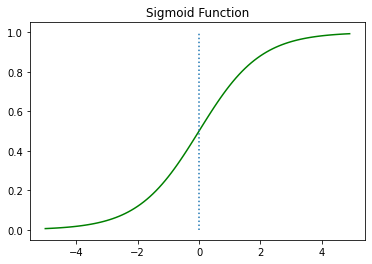

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'g')
plt.plot([0,0],[0.0,1.0], ":")
plt.title("Sigmoid Function")
plt.show()

W와 b 값에 따라 sigmoid function은 변하게 된다.

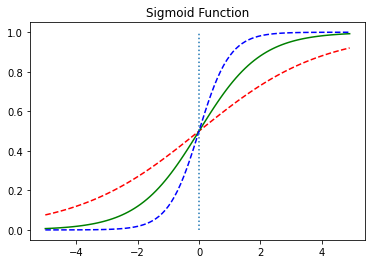

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [0.0, 1.0], ":")
plt.title('Sigmoid Function')
plt.show()

W가 작을 수록 경사가 완만해진다

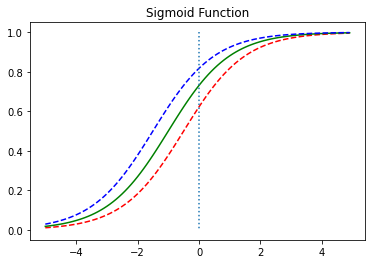

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2,1), requires_grad= True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
hypothesis = 1 / (1+torch.exp(-(x_train.matmul(W)+b)))

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
losses = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [ ]:
cost = losses.mean()
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [ ]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=1)

num_epochs = 1000
for epoch in range(num_epochs+1):
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis)).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, num_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
prediction

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

## 3-3 `nn.Module`로 구현하는 Logistic Regression



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [ ]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(),lr=1)

num_epochs = 1000
for epoch in range(num_epochs+1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)
  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    pred = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = pred.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, num_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(42)

model = BinaryClassifier()

In [30]:
optimizer = optim.SGD(model.parameters(), lr=1)
num_epochs = 1000
for epoch in range(num_epochs+1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)

    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, num_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 1.116662 Accuracy 50.00%
Epoch   10/1000 Cost: 1.017122 Accuracy 66.67%
Epoch   20/1000 Cost: 0.549955 Accuracy 83.33%
Epoch   30/1000 Cost: 0.452354 Accuracy 83.33%
Epoch   40/1000 Cost: 0.367874 Accuracy 83.33%
Epoch   50/1000 Cost: 0.288717 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220350 Accuracy 83.33%
Epoch   70/1000 Cost: 0.173810 Accuracy 100.00%
Epoch   80/1000 Cost: 0.151925 Accuracy 100.00%
Epoch   90/1000 Cost: 0.140459 Accuracy 100.00%
Epoch  100/1000 Cost: 0.131157 Accuracy 100.00%
Epoch  110/1000 Cost: 0.123039 Accuracy 100.00%
Epoch  120/1000 Cost: 0.115886 Accuracy 100.00%
Epoch  130/1000 Cost: 0.109534 Accuracy 100.00%
Epoch  140/1000 Cost: 0.103856 Accuracy 100.00%
Epoch  150/1000 Cost: 0.098751 Accuracy 100.00%
Epoch  160/1000 Cost: 0.094135 Accuracy 100.00%
Epoch  170/1000 Cost: 0.089942 Accuracy 100.00%
Epoch  180/1000 Cost: 0.086115 Accuracy 100.00%
Epoch  190/1000 Cost: 0.082609 Accuracy 100.00%
Epoch  200/1000 Cost: 0.079384 Accuracy 100.00%